In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [2]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]

In [6]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10,random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#clasifikasi
softmax_reg.predict([[5, 2]])
print(softmax_reg.predict([[5, 2]]))

[2]


In [10]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [12]:
 x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
print(x0)

[[0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 ...
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]]


In [13]:
print(x1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01758794 0.01758794 0.01758794 ... 0.01758794 0.01758794 0.01758794]
 [0.03517588 0.03517588 0.03517588 ... 0.03517588 0.03517588 0.03517588]
 ...
 [3.46482412 3.46482412 3.46482412 ... 3.46482412 3.46482412 3.46482412]
 [3.48241206 3.48241206 3.48241206 ... 3.48241206 3.48241206 3.48241206]
 [3.5        3.5        3.5        ... 3.5        3.5        3.5       ]]


In [14]:
print(X_new)

[[0.         0.        ]
 [0.01603206 0.        ]
 [0.03206413 0.        ]
 ...
 [7.96793587 3.5       ]
 [7.98396794 3.5       ]
 [8.         3.5       ]]


In [16]:
y_proba = softmax_reg.predict_proba(X_new)
print(y_proba)

[[9.99996239e-01 3.76140758e-06 6.80030712e-20]
 [9.99995941e-01 4.05882856e-06 7.85729317e-20]
 [9.99995620e-01 4.37976703e-06 9.07856856e-20]
 ...
 [7.73770362e-23 1.03687990e-11 1.00000000e+00]
 [6.69680312e-23 9.68354416e-12 1.00000000e+00]
 [5.79592787e-23 9.04357657e-12 1.00000000e+00]]


In [17]:
y_predict = softmax_reg.predict(X_new)
print(y_predict)

[0 0 0 ... 2 2 2]


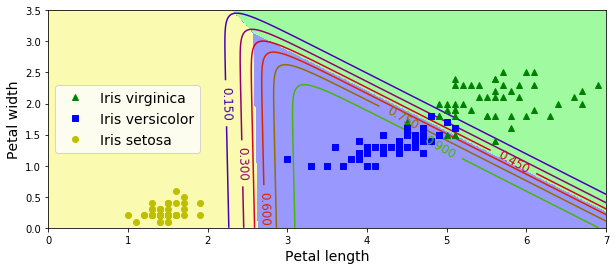

In [19]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()